In [2]:
# Boston Housing Price Prediction using Deep Neural Network

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [3]:

# Load dataset directly from keras.datasets
from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [4]:

# Normalize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:

# Build model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer (no activation for regression)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [7]:

# Train the model
history = model.fit(x_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 601.3587 - mae: 22.6209 - val_loss: 592.2366 - val_mae: 22.5953
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 514.1196 - mae: 20.6597 - val_loss: 531.9296 - val_mae: 21.2793
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 446.9016 - mae: 19.3113 - val_loss: 452.6784 - val_mae: 19.4321
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 368.1534 - mae: 17.0448 - val_loss: 353.6151 - val_mae: 16.8936
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 291.8792 - mae: 14.7249 - val_loss: 243.6218 - val_mae: 13.4364
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 158.9068 - mae: 10.5173 - val_loss: 146.8447 - val_mae: 9.6186
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 110.5398 - mae: 8.3349 - val_loss: 87.5297 - val_mae: 7.1110
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 68.7826 - mae: 6.2586 - val_loss: 64.0261 - val_mae: 6.1128
Epoch 9/100
11/1

In [8]:

# Evaluate the model
loss, mae = model.evaluate(x_test_scaled, y_test, verbose=2)
print(f"Test Mean Absolute Error: ${mae * 1000:.2f}")


4/4 - 0s - 11ms/step - loss: 24.4280 - mae: 3.3764
Test Mean Absolute Error: $3376.45


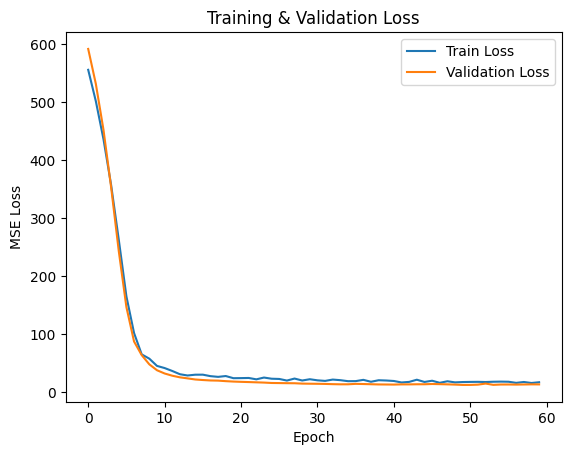

In [9]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


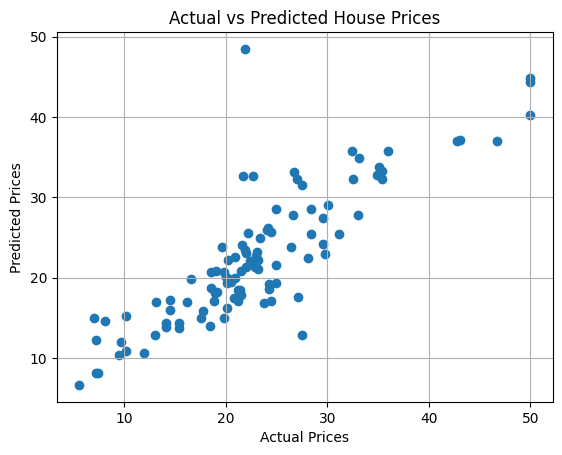

In [10]:
# Predict and visualize
y_pred = model.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()